# <font color="orange"><b>Fine-tune the Llama-3 Base Model for Conversational AI for Job Search App</b></font>

<i>Applications of NL(X) and LLM
<br>95820  - Fall 2024</i>
<br><font color="orange"><b>Author: Karl Cao, Sarthak Bisht, Ahmad Furqan</b></font>

---

gambar.png

<font size="2pt" color="red">image citation: DALL·E - OpenAI</font>

---

## <b>Phase 1: Data Collection and Preprocessing</b>

Welcome to the first phase of our SkillSync project! In this notebook, we'll walk through the process of collecting and preprocessing the provided datasets. This step is crucial for laying a strong foundation for fine-tuning our conversational AI model. Our goal here is to extract the relevant fields, clean the data, and prepare it for use in the next phase.

### <b>Dataset Overview</b>
We are working with two datasets:
1. **Train Dataset:** Contains information about resumes, job titles, locations, and job descriptions.
2. **Test Dataset:** Similar structure to the train set but will be used for model evaluation later.

These dataset have columns:
- **Resume -> Skill**
- **Job-Title**
- **Location**
- **Salary**
- **Description -> Experience**


In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import re
import unicodedata

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Reading the CSV files
train_data = pd.read_csv('data/train-1.csv')
test_data = pd.read_csv('data/test-1.csv')

In [3]:
print(">> Train Dataset: train-1.csv\n")
train_data.info()

print("\n>> Test Dataset: test-1.csv\n")
test_data.info()

>> Train Dataset: train-1.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Resume       596 non-null    object
 1   Job-Title    596 non-null    object
 2   Location     596 non-null    object
 3   Salary       161 non-null    object
 4   Description  596 non-null    object
dtypes: object(5)
memory usage: 23.4+ KB

>> Test Dataset: test-1.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Resume       149 non-null    object
 1   Job-Title    149 non-null    object
 2   Location     149 non-null    object
 3   Salary       45 non-null     object
 4   Description  149 non-null    object
dtypes: object(5)
memory usage: 5.9+ KB


In [4]:
# Display the first few rows of the datasets
train_data.head()

Resume  \
0  Enthusiastic Frontend Developer with a strong ...   
1  Results-driven Machine Learning Engineer with ...   
2  Experienced Frontend Developer specializing in...   
3  Experienced Mobile App Developer with expertis...   
4  Dynamic Full Stack Developer with expertise in...   

                           Job-Title                     Location  \
0          Senior Frontend Developer                      Finland   
1   Senior Machine Learning Engineer      New Delhi, Delhi, India   
2          Senior Frontend Developer  Bengaluru, Karnataka, India   
3                          Developer                   London, UK   
4  Intermediate Full Stack Developer                  Calgary, AB   

             Salary                                        Description  
0               NaN  Role: Senior Frontend🚀\n\nLocation: Remote - H...  
1               NaN  Who are Tide:\n\nAt Tide, we're on a mission t...  
2  ₹1.8M–₹3M a year  About the job\n\nSenior Frontend Developers at...  
3               NaN  Company Description\n\nWhitespace was establis...  
4               NaN  Who We Are\n\nHeadquartered in Calgary with op...

In [5]:
train_data.shape

(596, 5)

In [6]:
test_data.head()

Resume  \
0  Dynamic Frontend Developer with a passion for ...   
1  Innovative Full Stack Developer with a passion...   
2  Dynamic Machine Learning Engineer with a passi...   
3  Innovative Frontend Developer with a focus on ...   
4  Dynamic Cloud Engineer with expertise in autom...   

                                           Job-Title         Location  \
0                          Senior Frontend Developer     Edmonton, AB   
1                  Intermediate Full Stack Developer      Calgary, AB   
2                   Senior Machine Learning Engineer       Texas, USA   
3                          Senior Frontend Developer     Edmonton, AB   
4  Software Engineer (Intermediate) - GreenLake C...  Dublin, Ireland   

             Salary                                        Description  
0  $70K–$95K a year  Dear future teammate,\n\nThank you for conside...  
1               NaN  Who We Are\n\nHeadquartered in Calgary with op...  
2               NaN  ​​​The Company\n\nEncipher Technology has part...  
3  $70K–$95K a year  Dear future teammate,\n\nThank you for conside...  
4               NaN  Software Engineer (Intermediate) - GreenLake C...

In [7]:
test_data.shape

(149, 5)

### <b>Data Cleaning and Preprocessing</b>
Data cleaning is a crucial step in ensuring consistency and accuracy in our dataset. Here, we will:
- Converting Text to Lowercase.
- Handling Duplicated Rows.
- Handling Missing Value.
- Handling Pretext Columns: Functuation, URL, NewLines, Icons
- Standardizing other Columns.

We'll start by standardizing the text in relevant columns to lower case.


#### **a. Converting Text to Lowercase**

In our fine-tuning project, we are standardizing the text in relevant columns by converting the Resume, Job-Title, and Description fields to lowercase. This helps reduce variability in the data, ensuring that the model treats different capitalizations of the same word (e.g., "Python" vs. "python") consistently. However, we are leaving the Location and Salary columns unchanged, as these fields may contain specific formatting (e.g., acronyms or numerical ranges) where lowercasing could distort important information. This approach maintains data integrity while optimizing textual data for model training.

In [8]:
# Prepare cleaned dataset
train_data_cleaned = train_data.copy()
test_data_cleaned = test_data.copy()

In [9]:
test_data_cleaned.head(1)

Resume  \
0  Dynamic Frontend Developer with a passion for ...   

                   Job-Title      Location            Salary  \
0  Senior Frontend Developer  Edmonton, AB  $70K–$95K a year   

                                         Description  
0  Dear future teammate,\n\nThank you for conside...

In [10]:
# Lowercase relevant columns
def lowercase_columns(df):
    """
    Lowercase the 'Resume', 'Job-Title', and 'Description' columns.
    """
    df['Resume'] = df['Resume'].str.lower()
    df['Job-Title'] = df['Job-Title'].str.lower()
    df['Location'] = df['Location'].str.lower()
    df['Description'] = df['Description'].str.lower()
    return df

# Apply the function to both train and test datasets
train_data_cleaned = lowercase_columns(train_data_cleaned)
test_data_cleaned = lowercase_columns(test_data_cleaned)

In [11]:
# Display the results to verify the changes
train_data_cleaned.head(1)

Resume  \
0  enthusiastic frontend developer with a strong ...   

                   Job-Title Location Salary  \
0  senior frontend developer  finland    NaN   

                                         Description  
0  role: senior frontend🚀\n\nlocation: remote - h...

#### **b. Handling Duplicated Rows**

To ensure each record is unique, I checked for duplicate rows using all columns.

In [12]:
# Check for duplicate rows across all columns
train_duplicates = train_data_cleaned.duplicated()
test_duplicates = test_data_cleaned.duplicated()

# Summarizing the duplicates found
print(f"Number of duplicate rows in the train dataset: {train_duplicates.sum()}")
print(f"Number of duplicate rows in the test dataset: {test_duplicates.sum()}")

# If duplicates exist, we can drop them
if train_duplicates.sum() > 0:
    train_data_cleaned = train_data_cleaned[~train_duplicates]
    print(f"\nTrain dataset before removing duplicates: {train_data.shape}")
    print(f"Train dataset after removing duplicates: {train_data_cleaned.shape}")

if test_duplicates.sum() > 0:
    test_data_cleaned = test_data_cleaned[~test_duplicates]
    print(f"\nTest dataset before removing duplicates: {test_data.shape}")
    print(f"Test dataset after removing duplicates: {test_data_cleaned.shape}")

Number of duplicate rows in the train dataset: 289
Number of duplicate rows in the test dataset: 27

Train dataset before removing duplicates: (596, 5)
Train dataset after removing duplicates: (307, 5)

Test dataset before removing duplicates: (149, 5)
Test dataset after removing duplicates: (122, 5)


In the process of handling duplicate values, we found a significant number of duplicates: 289 in the train dataset and 27 in the test dataset. Since our goal is to ensure that the data used for fine-tuning the model is unique and reliable, we decided to remove these duplicate rows across all columns. This step helps prevent any potential bias or redundancy in the model's training. After removing the duplicates, the train dataset was reduced to 307 entries and the test dataset to 122 entries, ensuring that only unique job listings and resumes remain for further analysis.

#### <b>c. Handling Missing Value </b>

##### <b> Train Data</b>

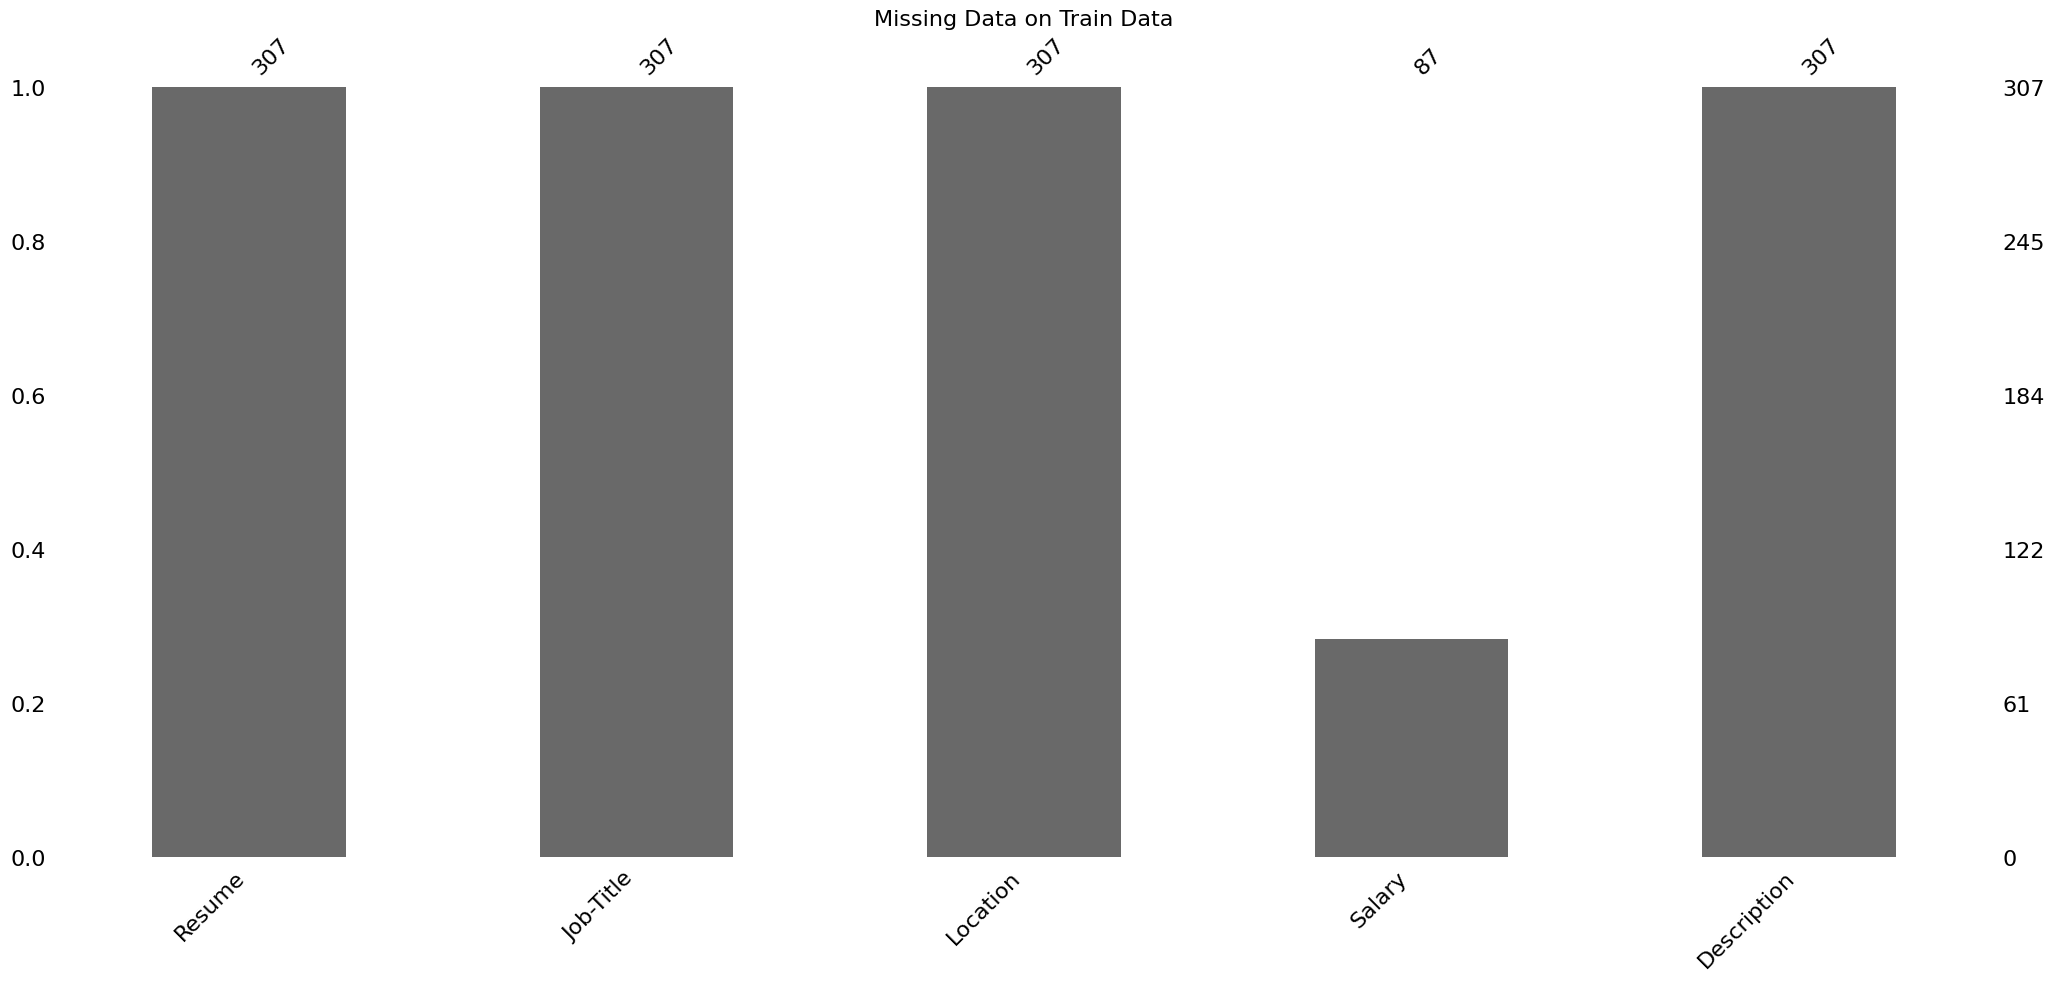

In [13]:
# Visualize missing data
msno.bar(train_data_cleaned)
plt.title("Missing Data on Train Data", fontsize=16)
plt.show()

In [14]:
# Display the information of the dataset
train_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, 0 to 590
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Resume       307 non-null    object
 1   Job-Title    307 non-null    object
 2   Location     307 non-null    object
 3   Salary       87 non-null     object
 4   Description  307 non-null    object
dtypes: object(5)
memory usage: 14.4+ KB


In [15]:
# Checking for missing values in the train
print("Train Data:")
train_data_cleaned.isnull().sum()

Train Data:


Resume           0
Job-Title        0
Location         0
Salary         220
Description      0
dtype: int64

##### <b> Test Data </b>

In [16]:
# Visualize missing data
msno.bar(test_data_cleaned)
plt.title("Missing Data on Train Data", fontsize=16)
plt.show()

In [17]:
test_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Resume       122 non-null    object
 1   Job-Title    122 non-null    object
 2   Location     122 non-null    object
 3   Salary       37 non-null     object
 4   Description  122 non-null    object
dtypes: object(5)
memory usage: 5.7+ KB


In [18]:
# Checking for missing values in the test datasets
print("Test Data:")
test_data_cleaned.isnull().sum()

Test Data:


Resume          0
Job-Title       0
Location        0
Salary         85
Description     0
dtype: int64

In our dataset, we encountered a significant number of missing salary values, which affect our model's ability to accurately handle job-related queries based on salary criteria. Since salary is one of the key criteria users will query (e.g., "What jobs offer a salary of over $100k?"), it is important to address these missing values effectively. To handle this, we opted for a hybrid approach: Option 1 (Imputation Based on Job Title and Location), where we estimate missing salaries based on similar job titles and locations, combined with Option 2 (Salary Range Buckets), which assigns generalized salary categories when exact values cannot be confidently imputed. This approach balances data completeness while ensuring the model can handle salary-based queries reliably

In [19]:
# Format Salary
def convert_salary(df):
    # Example exchange rate for conversion
    exchange_rate_inr_to_usd = 0.012

    def convert_to_usd(value):
        """Convert the value to USD based on its suffix."""
        if 'M' in value:
            return float(value.replace('M', '').strip()) * 1000000 * exchange_rate_inr_to_usd
        elif 'K' in value:
            return float(value.replace('K', '').strip()) * 1000  # Direct conversion for USD values
        else:
            return float(value.strip())  # Assuming it's already a numeric value

    def standardize_salary(salary):
        """Standardize the salary input to a numeric range."""
        if isinstance(salary, str):
            if '₹' in salary:  # Indian Rupee format
                salary = salary.replace('₹', '').replace(' a year', '').replace('–', '-')
                min_salary, max_salary = map(lambda x: convert_to_usd(x.strip()), salary.split('-'))
            elif 'US$' in salary or '$' in salary:  # USD format
                salary = salary.replace('US$', '').replace('$', '').replace(' a year', '').replace('–', '-')
                min_salary, max_salary = map(lambda x: convert_to_usd(x.strip()), salary.split('-'))
            else:
                return (np.nan, np.nan)  # Handle unexpected formats
        else:
            return (np.nan, np.nan)  # Handle non-string entries

        return (min_salary, max_salary)

    def format_salary_range(salary_range):
        """Format the salary range into a human-readable string."""
        if salary_range is not None:
            min_salary, max_salary = salary_range
            return (f"over ${min_salary/1000:.0f}K" if min_salary > 0 else "No minimum salary") + \
                (f" and under ${max_salary/1000:.0f}K" if max_salary > 0 else "No maximum salary")
        return "Salary data not available"

    # Step 2: Apply the standardization and formatting to the salary entries (including imputed values)
    df['Standardized_Salary_Range'] = df['Salary'].apply(standardize_salary)
    df['Formatted_Salary'] = df['Standardized_Salary_Range'].apply(format_salary_range)

    return df

# 1. Define salary range buckets
def categorize_salary(salary):
    """
    Convert salary values to general buckets for ease of classification.
    Example: $50K–$75K, $75K–$100K, etc.
    """
    salary = str(salary).replace(',', '').replace('$', '').replace('₹', '').strip()

    if 'year' in salary.lower():
        salary = salary.lower().replace('a year', '').strip()

    try:
        salary = float(salary) 
    except ValueError:
        return np.nan

    if salary < 50000:
        return 'under $50K'
    elif 50000 <= salary < 75000:
        return '$50K–$75K'
    elif 75000 <= salary < 100000:
        return '$75K–$100K'
    elif 100000 <= salary < 150000:
        return '$100K–$150K'
    else:
        return 'over $150K'

# Apply salary bucket categorization for known salaries
def apply_salary_buckets(df):
    df['Salary Bucket'] = df['Salary'].apply(categorize_salary)
    return df

# 2. Imputation based on Job Title and Location
def impute_salary_by_title_location(df):
    """
    Impute missing salary values based on median salary for the same Job Title and Location.
    """
    # Group by Job Title and Location to compute median salary bucket
    salary_mapping = df.groupby(['Job-Title', 'Location'])['Salary Bucket'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()

    # Impute missing salaries
    def impute_salary(row):
        if pd.isnull(row['Salary Bucket']):
            return salary_mapping.get((row['Job-Title'], row['Location']), 'Unknown')
        return row['Salary Bucket']

    df['Imputed Salary Bucket'] = df.apply(impute_salary, axis=1)
    return df

# 3. Final step: Assign "Unknown" for any remaining missing salary values
def finalize_salary_imputation(df):
    """
    Finalize the salary imputation process:
    - If 'Imputed Salary Bucket' is null, check the 'Salary' column.
    - If 'Salary' is null, fill 'Imputed Salary Bucket' with 'Unknown'.
    - If 'Salary' is not null, take the value from 'Salary' and assign it to 'Imputed Salary Bucket'.
    """
    def fill_imputed_salary(row):
        if pd.isna(row['Imputed Salary Bucket']):  # If 'Imputed Salary Bucket' is null
            if pd.isna(row['Salary']):  # If 'Salary' is also null, assign 'Unknown'
                return 'Unknown'
            else:
                return row['Formatted_Salary']  # Otherwise, take the 'Salary' value
        return row['Imputed Salary Bucket']  # If 'Imputed Salary Bucket' is not null, keep it

    # Apply the logic to the entire DataFrame
    df['Imputed Salary'] = df.apply(fill_imputed_salary, axis=1)

    return df

# Run the entire process on both datasets
def process_salary_imputation(df):
    df = convert_salary(df)
    df = apply_salary_buckets(df)
    df = impute_salary_by_title_location(df)
    df = finalize_salary_imputation(df)
    return df

# Impute missing salaries in both datasets
train_data_cleaned = process_salary_imputation(train_data_cleaned)
test_data_cleaned = process_salary_imputation(test_data_cleaned)

# # # Drop the 'Salary Bucket' and 'Imputed Salary Bucket' columns from both datasets
# def drop_unnecessary_columns(df):
#     """
#     Drop 'Salary Bucket' and 'Imputed Salary Bucket' columns.
#     """
#     return df.drop(columns=['Standardized_Salary_Range', 'Formatted_Salary', 'Salary Bucket', 'Imputed Salary Bucket'])

# # Apply the function to both train and test datasets
# train_data_cleaned = drop_unnecessary_columns(train_data_cleaned)
# test_data_cleaned = drop_unnecessary_columns(test_data_cleaned)

# Check missing value count in Imputed Salary
print("\nMissing value count in Imputed Salary (Train):", train_data_cleaned['Imputed Salary'].isnull().sum())
print("Missing value count in Imputed Salary (Test):", test_data_cleaned['Imputed Salary'].isnull().sum())


Missing value count in Imputed Salary (Train): 0
Missing value count in Imputed Salary (Test): 0


In [20]:
train_data_cleaned.head(1)

Resume  \
0  enthusiastic frontend developer with a strong ...   

                   Job-Title Location Salary  \
0  senior frontend developer  finland    NaN   

                                         Description  \
0  role: senior frontend🚀\n\nlocation: remote - h...   

  Standardized_Salary_Range                    Formatted_Salary Salary Bucket  \
0                (nan, nan)  No minimum salaryNo maximum salary    over $150K   

  Imputed Salary Bucket Imputed Salary  
0            over $150K     over $150K

In [21]:
test_data_cleaned.head(1)

Resume  \
0  dynamic frontend developer with a passion for ...   

                   Job-Title      Location            Salary  \
0  senior frontend developer  edmonton, ab  $70K–$95K a year   

                                         Description  \
0  dear future teammate,\n\nthank you for conside...   

  Standardized_Salary_Range          Formatted_Salary Salary Bucket  \
0        (70000.0, 95000.0)  over $70K and under $95K           NaN   

  Imputed Salary Bucket            Imputed Salary  
0                   NaN  over $70K and under $95K

#### <b>d. Handling Pretext Columns: Resume and Description</b>

In this step, we focused on cleaning the Resume and Description columns, which contain the most relevant textual data for our model. We removed punctuation, URLs, and newline characters to reduce noise and standardize the text. These elements are not meaningful for our model and could interfere with accurate text processing during fine-tuning. By applying these text-cleaning techniques, we ensure that the model receives clean and consistent data, which will improve its ability to understand job-related information and provide accurate responses.

In [22]:
test_data_cleaned.columns

Index(['Resume', 'Job-Title', 'Location', 'Salary', 'Description',
       'Standardized_Salary_Range', 'Formatted_Salary', 'Salary Bucket',
       'Imputed Salary Bucket', 'Imputed Salary'],
      dtype='object')

In [23]:
# Function to remove URLs and newlines
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r'[^\w\s]', ' ', text) # Remove punctuation
    text = text.replace('\n', ' ') # Replace newline characters with space
    text = re.sub('\n\n', ' ', text)  # Replace double newline characters with space
    text = re.sub(r'\s+', ' ', text).strip() # Remove multiple spaces
    
    return text

# Apply the cleaning function to relevant columns in the datasets
def clean_datasets(df):
    df['Resume'] = df['Resume'].apply(clean_text)
    df['Description'] = df['Description'].apply(clean_text)
    return df

# Apply to train and test datasets
train_data_cleaned = clean_datasets(train_data_cleaned)
test_data_cleaned = clean_datasets(test_data_cleaned)

In [24]:
# Display the cleaned dataset to verify the changes
train_data_cleaned.head(1)

Resume  \
0  enthusiastic frontend developer with a strong ...   

                   Job-Title Location Salary  \
0  senior frontend developer  finland    NaN   

                                         Description  \
0  role senior frontend location remote helsinki ...   

  Standardized_Salary_Range                    Formatted_Salary Salary Bucket  \
0                (nan, nan)  No minimum salaryNo maximum salary    over $150K   

  Imputed Salary Bucket Imputed Salary  
0            over $150K     over $150K

In [25]:
# Display the cleaned dataset to verify the changes
test_data_cleaned.head(1)

Resume  \
0  dynamic frontend developer with a passion for ...   

                   Job-Title      Location            Salary  \
0  senior frontend developer  edmonton, ab  $70K–$95K a year   

                                         Description  \
0  dear future teammate thank you for considering...   

  Standardized_Salary_Range          Formatted_Salary Salary Bucket  \
0        (70000.0, 95000.0)  over $70K and under $95K           NaN   

  Imputed Salary Bucket            Imputed Salary  
0                   NaN  over $70K and under $95K

During data cleaning, we identified the presence of various icons, such as emojis, symbols, and pictographs, in the Resume and Description columns. These elements are not meaningful for our model and could interfere with accurate text processing. To handle this, we removed all icons and symbols, ensuring that only the relevant textual information remains. This step ensures cleaner, standardized data, improving the model’s ability to process and understand the content.

In [26]:
import re

# Function to remove all icons (including emojis)
def remove_icons(text):
    icon_pattern = re.compile("[" 
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # miscellaneous symbols
                           u"\U0001F900-\U0001F9FF"  # supplemental symbols and pictographs
                           u"\U00002000-\U00002BFF"  # arrows, bullets, stars, math operators
                           u"\U0000FE0F-\U0000FEFF"  # variation selectors
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\u200d"                 # zero-width joiner
                           u"\u2640-\u2642"          # gender symbols
                           u"\u2600-\u26FF"          # miscellaneous symbols
                           u"\u23cf"                 # eject symbol
                           u"\u23e9"                 # fast-forward
                           u"\u231a"                 # watch
                           u"\ufe0f"                 # dingbats
                           u"\u3030"                 # wavy dash
                           "]+", flags=re.UNICODE)
    return re.sub(icon_pattern, '', text)

# Apply icon removal to relevant columns in the datasets
def clean_datasets_icons(df):
    df['Resume'] = df['Resume'].apply(remove_icons)
    df['Description'] = df['Description'].apply(remove_icons)
    return df

# Apply to train and test datasets
train_data_cleaned = clean_datasets_icons(train_data_cleaned)
test_data_cleaned = clean_datasets_icons(test_data_cleaned)

In [27]:
# Display the results to verify the changes
train_data_cleaned.head(1)

Resume  \
0  enthusiastic frontend developer with a strong ...   

                   Job-Title Location Salary  \
0  senior frontend developer  finland    NaN   

                                         Description  \
0  role senior frontend location remote helsinki ...   

  Standardized_Salary_Range                    Formatted_Salary Salary Bucket  \
0                (nan, nan)  No minimum salaryNo maximum salary    over $150K   

  Imputed Salary Bucket Imputed Salary  
0            over $150K     over $150K

In [28]:
# Display the results to verify the changes
test_data_cleaned.head(1)

Resume  \
0  dynamic frontend developer with a passion for ...   

                   Job-Title      Location            Salary  \
0  senior frontend developer  edmonton, ab  $70K–$95K a year   

                                         Description  \
0  dear future teammate thank you for considering...   

  Standardized_Salary_Range          Formatted_Salary Salary Bucket  \
0        (70000.0, 95000.0)  over $70K and under $95K           NaN   

  Imputed Salary Bucket            Imputed Salary  
0                   NaN  over $70K and under $95K

To further clean and normalize the dataset, we applied several additional text normalization techniques. These include expanding common contractions and normalizing Unicode characters to ensure text consistency. These steps reduce unnecessary variation in the text and ensure that the model receives well-structured and clean input, improving its ability to process and understand the job-related content accurately.

In [29]:
# Function to normalize text by expanding contractions and normalizing Unicode
def normalize_text(text):
        # Expand common contractions (for demonstration, only a few contractions are expanded)
    contractions = {
        "can't": "cannot",
        "won't": "will not",
        "n't": " not",
        "'ll": " will",
        "'re": " are",
        "'ve": " have",
        "'d": " would",
        "'m": " am"
    }
    for contraction, expanded in contractions.items():
        text = re.sub(contraction, expanded, text)

    # Normalize unicode characters
    text = unicodedata.normalize('NFKD', text)

    return text

# Apply the normalization function to relevant columns in the datasets
def normalize_datasets(df):
    df['Resume'] = df['Resume'].apply(normalize_text)
    df['Description'] = df['Description'].apply(normalize_text)
    return df

# Apply to train and test datasets
train_data_cleaned = normalize_datasets(train_data_cleaned)
test_data_cleaned = normalize_datasets(test_data_cleaned)

In [30]:
train_data_cleaned.head(1)

Resume  \
0  enthusiastic frontend developer with a strong ...   

                   Job-Title Location Salary  \
0  senior frontend developer  finland    NaN   

                                         Description  \
0  role senior frontend location remote helsinki ...   

  Standardized_Salary_Range                    Formatted_Salary Salary Bucket  \
0                (nan, nan)  No minimum salaryNo maximum salary    over $150K   

  Imputed Salary Bucket Imputed Salary  
0            over $150K     over $150K

In [31]:
test_data_cleaned.head(1)

Resume  \
0  dynamic frontend developer with a passion for ...   

                   Job-Title      Location            Salary  \
0  senior frontend developer  edmonton, ab  $70K–$95K a year   

                                         Description  \
0  dear future teammate thank you for considering...   

  Standardized_Salary_Range          Formatted_Salary Salary Bucket  \
0        (70000.0, 95000.0)  over $70K and under $95K           NaN   

  Imputed Salary Bucket            Imputed Salary  
0                   NaN  over $70K and under $95K

#### <b>e. Standardizing Salary, Job Title, and Location</b>

In this step, we standardized the Salary, Job Title, and Location columns. This included removing inconsistencies in salary formats, expanding abbreviations in job titles, and normalizing location names to ensure uniformity. By ensuring that these important columns are consistent, we improve the quality of the dataset, helping the model to interpret and respond to job-related queries more accurately.

In [32]:
# Function to clean and standardize job titles (expanding abbreviations and removing extra spaces)
def clean_job_title(job_title):
    job_title = str(job_title)  # Convert to string to avoid errors
    job_title = job_title.replace("s/w", "software")
    job_title = job_title.replace("dev", "developer")
    job_title = re.sub(r'\s+', ' ', job_title).strip()  # Remove extra spaces
    return job_title

# Function to clean and standardize locations (expanding abbreviations and ensuring consistency)
def clean_location(location):
    location = str(location)  # Convert to string to avoid errors
    location = location.replace("nyc", "new york city")
    location = location.replace("usa", "united states")
    location = re.sub(r'\s+', ' ', location).strip()  # Remove extra spaces
    return location

# Final function to clean Salary, Imputed Salary, Job Title, and Location
def clean_additional_columns(df):
    df['Job-Title'] = df['Job-Title'].apply(clean_job_title) 
    df['Location'] = df['Location'].apply(clean_location)
    return df

# Apply to both datasets
train_data_cleaned = clean_additional_columns(train_data_cleaned)
test_data_cleaned = clean_additional_columns(test_data_cleaned)

In [33]:
train_data_cleaned.head(1)

Resume  \
0  enthusiastic frontend developer with a strong ...   

                         Job-Title Location Salary  \
0  senior frontend developereloper  finland    NaN   

                                         Description  \
0  role senior frontend location remote helsinki ...   

  Standardized_Salary_Range                    Formatted_Salary Salary Bucket  \
0                (nan, nan)  No minimum salaryNo maximum salary    over $150K   

  Imputed Salary Bucket Imputed Salary  
0            over $150K     over $150K

In [34]:
from transformers import pipeline

# Load the summarization model from Hugging Face
summarizer = pipeline("summarization")

# Function to summarize text using Hugging Face summarization model
def summarize_description(text, max_length=130, min_length=30):
    try:
        summary = summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)
        return summary[0]['summary_text']
    except Exception as e:
        return text  # If there's an issue, return the original text

# Function to process job description
def process_job_description(description):
    # Summarize the job description using the transformers model
    summary = summarize_description(description)
    
    # Return only the summary
    return summary

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [35]:
# Apply the summarization function to the 'Description' column
test_data_cleaned['Summarized_Resume'] = test_data_cleaned['Resume'].apply(process_job_description)
test_data_cleaned['Summarized_Description'] = test_data_cleaned['Description'].apply(process_job_description)

Your max_length is set to 130, but your input_length is only 118. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=59)
Your max_length is set to 130, but your input_length is only 127. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=63)
Your max_length is set to 130, but your input_length is only 116. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=58)
Your max_length is set to 130, but your input_length is only 110. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)


In [37]:
test_data_cleaned.head(1)

Resume  \
0  dynamic frontend developer with a passion for ...   

                         Job-Title      Location            Salary  \
0  senior frontend developereloper  edmonton, ab  $70K–$95K a year   

                                         Description  \
0  dear future teammate thank you for considering...   

  Standardized_Salary_Range          Formatted_Salary Salary Bucket  \
0        (70000.0, 95000.0)  over $70K and under $95K           NaN   

  Imputed Salary Bucket            Imputed Salary  \
0                   NaN  over $70K and under $95K   

                                   Summarized_Resume  \
0   dynamic frontend developer with a passion for...   

                              Summarized_Description  
0   We build shopify plus sanity wordpress and so...

In [38]:
# Apply the summarization function to the 'Description' column
train_data_cleaned['Summarized_Resume'] = train_data_cleaned['Resume'].apply(process_job_description)
train_data_cleaned['Summarized_Description'] = train_data_cleaned['Description'].apply(process_job_description)

Your max_length is set to 130, but your input_length is only 122. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)
Your max_length is set to 130, but your input_length is only 101. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 130, but your input_length is only 122. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)
Your max_length is set to 130, but your input_length is only 118. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=59)


In [39]:
train_data_cleaned.head(1)

Resume  \
0  enthusiastic frontend developer with a strong ...   

                         Job-Title Location Salary  \
0  senior frontend developereloper  finland    NaN   

                                         Description  \
0  role senior frontend location remote helsinki ...   

  Standardized_Salary_Range                    Formatted_Salary Salary Bucket  \
0                (nan, nan)  No minimum salaryNo maximum salary    over $150K   

  Imputed Salary Bucket Imputed Salary  \
0            over $150K     over $150K   

                                   Summarized_Resume  \
0   enthusiastic frontend developer with a strong...   

                              Summarized_Description  
0   Senior frontend location remote helsinki sala...

In [ ]:
# def transform_resume(df, dfname):
#     df = df.drop(columns=['Resume', 'Description', 'Salary', 'Salary Bucket', 'Imputed Salary Bucket'])

#     # Rename columns
#     df = df.rename(columns={
#         'Summarized_Resume': 'Resume',
#         'Summarized_Description': 'Description',
#         'Imputed Salary': 'Salary'
#     })

#     # Reorder the columns
#     df = df[['Resume', 'Job-Title', 'Location', 'Salary', 'Description']]

#     # Save the updated DataFrame back to a CSV file if needed
#     df.to_csv(f'{dfname}.csv', index=False, encoding='utf-8')

In [40]:
train_data_cleaned.to_csv('train-1_cleaned_raw2.csv', index=False, encoding='utf-8')
test_data_cleaned.to_csv('test-1_cleaned_raw2.csv', index=False, encoding='utf-8')

In [42]:
train_data_cleaned.head()

Resume  \
0  enthusiastic frontend developer with a strong ...   
1  results driven machine learning engineer with ...   
2  experienced frontend developer specializing in...   
3  experienced mobile app developer with expertis...   
4  dynamic full stack developer with expertise in...   

                                 Job-Title                     Location  \
0          senior frontend developereloper                      finland   
1         senior machine learning engineer      new delhi, delhi, india   
2          senior frontend developereloper  bengaluru, karnataka, india   
3                          developereloper                   london, uk   
4  intermediate full stack developereloper                  calgary, ab   

             Salary                                        Description  \
0               NaN  role senior frontend location remote helsinki ...   
1               NaN  who are tide at tide we re on a mission to sav...   
2  ₹1.8M–₹3M a year  about the job senior frontend developers at ta...   
3               NaN  company description whitespace was established...   
4               NaN  who we are headquartered in calgary with opera...   

  Standardized_Salary_Range                    Formatted_Salary Salary Bucket  \
0                (nan, nan)  No minimum salaryNo maximum salary    over $150K   
1                (nan, nan)  No minimum salaryNo maximum salary    over $150K   
2        (21600.0, 36000.0)            over $22K and under $36K           NaN   
3                (nan, nan)  No minimum salaryNo maximum salary    over $150K   
4                (nan, nan)  No minimum salaryNo maximum salary    over $150K   

  Imputed Salary Bucket            Imputed Salary  \
0            over $150K                over $150K   
1            over $150K                over $150K   
2                   NaN  over $22K and under $36K   
3            over $150K                over $150K   
4            over $150K                over $150K   

                                   Summarized_Resume  \
0   enthusiastic frontend developer with a strong...   
1   Results driven machine learning engineer has ...   
2   experienced frontend developer specializing i...   
3   experienced mobile app developer with experti...   
4   dynamic full stack developer with expertise i...   

                              Summarized_Description  
0   Senior frontend location remote helsinki sala...  
1   tide at tide is the leading provider of uk sm...  
2   Senior frontend developers at taxnodes work o...  
3   The role will involve both new development an...  
4   The intermediate full stack developer contrib...

In [ ]:
# train_cleaned_exp = train_data_cleaned.copy()
# test_cleaned_exp = test_data_cleaned.copy()

### <b>Data Preparation for Conversational Tasks</b>

#### <b>a. Create <Job Query, Job Description> Pairs:</b>

We'll create pairs of job queries and job descriptions. Each query is extracted from relevant columns like Resume (skills), Location, Imputed Salary, and Description, and paired with its corresponding job description.

In [41]:
# List of instruction variations
instruction_templates = [
    "Answer the following job-related query accurately",
    "Provide job information based on the user's question",
    "Respond to the job search query with precise details",
    # "Give detailed information in response to the job query",
    # "Answer the user's question about job opportunities",
    # "Provide accurate job-related details based on the user's query",
    # "Respond to the job inquiry with relevant job information",
    # "Give a precise response to the following job-related question",
    # "Answer the job-related question with the required details",
    # "Provide job search information based on the user's request"
]

# List of query variations for different categories
skills_query_templates = [
    "What jobs are available for {}?",
    "Are there jobs for {}?",
    "What roles are available for {}?",
    # "Could you show me jobs for {}?",
    # "I'm looking for jobs that require {}.",
    # "Find me jobs for {} experts.",
    # "What developer jobs are available for {}?",
    # "Show me jobs requiring {} skills.",
    # "What jobs need {} skills?",
    # "Which positions are open for {}?"
]

location_query_templates = [
    "What jobs are open in {}?",
    "What jobs are available in {}?",
    "Give me the information of available jobs in {}.",
    # "Are there jobs open in {}?",
    # "Any job openings in {}?",
    # "Which jobs are available in {}?",
    # "Show me jobs in {}.",
    # "What positions are open in {}?",
    # "What jobs can I find in {}?",
    # "List available jobs in {}."
]

salary_query_templates = [
    "What jobs offer a salary of {}?",
    "Which jobs pay over {}?",
    "Are there jobs with a salary of {}?",
    # "Show me jobs paying more than {}.",
    # "What jobs are available with a salary of {}?",
    # "List jobs with a salary of {}.",
    # "Any jobs offering a salary above {}?",
    # "What jobs provide a salary over {}?",
    # "Show me jobs with a salary above {}.",
    # "Find me jobs with a salary range of {}."
]

experience_query_templates = [
    "What jobs are available for someone with {} years of experience?",
    "What roles can I find for someone with {} years of experience?",
    "Are there jobs for candidates with {} years of experience?",
    # "Show me jobs for someone with {} years of development experience.",
    # "What jobs are available for an experienced {}?",
    # "Find me jobs for professionals with {} years of experience.",
    # "Which jobs require {} years of experience?",
    # "What positions are available for someone with {} years in management?",
    # "List jobs for people with {} years of experience.",
    # "Are there positions for someone with {} years of experience?"
]

In [ ]:
# First Approach: we randomize a question from query templates

# # Function to generate queries based on column data
# def generate_query(row, query_type):
#     if query_type == 'skills':
#         # Combine skills from both 'Resume' and 'Description' columns
#         skill_info = row['Resume'] + " and " + row['Description']
#         query = random.choice(skills_query_templates).format(skill_info)
#     elif query_type == 'location':
#         location = row['Location']
#         query = random.choice(location_query_templates).format(location)
#     elif query_type == 'salary':
#         salary = row['Imputed Salary']
#         query = random.choice(salary_query_templates).format(salary)
#     elif query_type == 'experience':
#         experience = row['Description']  # Assume experience is described in the 'Description' column
#         query = random.choice(experience_query_templates).format(experience)
#     return query

# # Function to generate job descriptions based on the query type
# def generate_job_description(row, query_type):
#     if query_type == 'location':
#         description = f"Job available in {row['Location']}\nJob-Title: {row['Job-Title']}\nSalary: {row['Imputed Salary']}\nResume: {row['Resume']}\nDescription: {row['Description']}"
#     elif query_type == 'skills':
#         description = f"Job available for {row['Resume']}\nLocation: {row['Location']}\nSalary: {row['Imputed Salary']}\nJob-Title: {row['Job-Title']}\nDescription: {row['Description']}"
#     elif query_type == 'salary':
#         description = f"Job available with a salary of {row['Imputed Salary']}\nLocation: {row['Location']}\nJob-Title: {row['Job-Title']}\nResume: {row['Resume']}\nDescription: {row['Description']}"
#     elif query_type == 'experience':
#         description = f"Job available for someone with {row['Description']}\nLocation: {row['Location']}\nJob-Title: {row['Job-Title']}\nSalary: {row['Imputed Salary']}\nResume: {row['Resume']}"
#     return description

# # Function to generate varied instructions
# def generate_instruction():
#     return random.choice(instruction_templates)

# # Combine everything into a final function that prepares the dataset
# def prepare_conversational_data(df):
#     conversational_data = {
#         'Instructions': [],
#         'Job Query': [],
#         'Job Description': []
#     }
    
#     query_types = ['skills', 'location', 'salary', 'experience']
    
#     for index, row in df.iterrows():
#         for query_type in query_types:
#             # Generate the instruction
#             instruction = generate_instruction()
#             conversational_data['Instructions'].append(instruction)
            
#             # Generate the job query
#             query = generate_query(row, query_type)
#             conversational_data['Job Query'].append(query)
            
#             # Generate the job description
#             job_description = generate_job_description(row, query_type)
#             conversational_data['Job Description'].append(job_description)
    
#     # Convert to a DataFrame
#     conversational_df = pd.DataFrame(conversational_data)
    
#     return conversational_df

# # Apply the function to generate the final dataset
# conversational_train_df = prepare_conversational_data(train_data_cleaned)

# # Save the dataset to a CSV file
# conversational_train_df.to_csv('conversational_job_data_train.csv', index=False)

# # Display the first few rows of the generated data
# conversational_train_df.head()

In [43]:
# Second Approach: augment data by looping all query variations from query template
import random

# Function to generate varied instructions
def generate_instruction():
    return random.choice(instruction_templates)

# Function to generate all job descriptions for a given query type
# def generate_all_job_descriptions(row, query_type):
#     descriptions = []
#     if query_type == 'location':
#         for _ in location_query_templates:
#             descriptions.append(f"Job available in {row['Location']}\nJob-Title: {row['Job-Title']}\nSalary: {row['Imputed Salary']}\nResume: {row['Resume']}\nDescription: {row['Description']}")
#     elif query_type == 'skills':
#         for _ in skills_query_templates:
#             descriptions.append(f"Job available for {row['Resume']}\nLocation: {row['Location']}\nSalary: {row['Imputed Salary']}\nJob-Title: {row['Job-Title']}\nDescription: {row['Description']}")
#     elif query_type == 'salary':
#         for _ in salary_query_templates:
#             descriptions.append(f"Job available with a salary of {row['Imputed Salary']}\nLocation: {row['Location']}\nJob-Title: {row['Job-Title']}\nResume: {row['Resume']}\nDescription: {row['Description']}")
#     elif query_type == 'experience':
#         for _ in experience_query_templates:
#             descriptions.append(f"Job available for someone with {row['Description']}\nLocation: {row['Location']}\nJob-Title: {row['Job-Title']}\nSalary: {row['Imputed Salary']}\nResume: {row['Resume']}")
#     return descriptions

# Function to generate all variations of queries for each type
def generate_all_queries(row, query_type):
    queries = []
    if query_type == 'skills':
        # skill_info = row['Resume'] + " and " + row['Description']
        skill_info = row['Summarized_Resume'] # to shorten the finetune process
        for template in skills_query_templates:
            queries.append(template.format(skill_info))
    elif query_type == 'location':
        location = row['Location']
        for template in location_query_templates:
            queries.append(template.format(location))
    elif query_type == 'salary':
        salary = row['Imputed Salary']
        for template in salary_query_templates:
            queries.append(template.format(salary))
    elif query_type == 'experience':
        experience = row['Summarized_Description']  # Assume experience is described in the 'Description' column
        for template in experience_query_templates:
            queries.append(template.format(experience))
    return queries

def generate_all_job_descriptions(row, query_type):
    descriptions = []
    if query_type == 'location':
        for _ in location_query_templates:
            descriptions.append(f"Job available in {row['Location']}\nJob-Title: {row['Job-Title']}\nSalary: {row['Imputed Salary']}\nDescription: {row['Summarized_Description']}")
    elif query_type == 'skills':
        for _ in skills_query_templates:
            descriptions.append(f"Job available in Location: {row['Location']}\nSalary: {row['Imputed Salary']}\nJob-Title: {row['Job-Title']}\nDescription: {row['Summarized_Description']}")
    elif query_type == 'salary':
        for _ in salary_query_templates:
            descriptions.append(f"Job available with a salary of {row['Imputed Salary']}\nLocation: {row['Location']}\nJob-Title: {row['Job-Title']}\nDescription: {row['Summarized_Description']}")
    elif query_type == 'experience':
        for _ in experience_query_templates:
            descriptions.append(f"Job available in Location: {row['Location']}\nJob-Title: {row['Job-Title']}\nSalary: {row['Imputed Salary']}\nDescription: {row['Summarized_Description']}")
    return descriptions

# Combine everything into a final function that prepares the dataset with all variations
def prepare_conversational_data_with_all_variations(df):
    conversational_data = {
        'Instructions': [],
        'Job Query': [],
        'Job Description': []
    }
    
    query_types = ['skills', 'location', 'salary', 'experience']
    
    for index, row in df.iterrows():
        for query_type in query_types:
            queries = generate_all_queries(row, query_type)
            descriptions = generate_all_job_descriptions(row, query_type)
            
            for i in range(len(queries)):
                # Generate varied instructions
                instruction = generate_instruction()
                conversational_data['Instructions'].append(instruction)
                
                # Add all variations of queries and descriptions
                conversational_data['Job Query'].append(queries[i])
                conversational_data['Job Description'].append(descriptions[i])
    
    # Convert to a DataFrame
    conversational_df = pd.DataFrame(conversational_data)
    
    return conversational_df

In [53]:
# Apply the function to generate the dataset with all query variations
conversational_df_all_variations_train_data = prepare_conversational_data_with_all_variations(train_data_cleaned)

# conversational_df_all_variations_train_data.rename(columns={'Job Query': 'inputs'}, inplace=True)
# conversational_df_all_variations_train_data.rename(columns={'Job Description': 'outputs'}, inplace=True)

# Save the dataset to a CSV file
conversational_df_all_variations_train_data.to_csv('conversational_job_data_train_v4.csv', encoding='utf-8', errors='replace', index=False)

# Display the first few rows of the generated data
conversational_df_all_variations_train_data.head()

Instructions  \
0  Respond to the job search query with precise details   
1  Provide job information based on the user's question   
2     Answer the following job-related query accurately   
3  Respond to the job search query with precise details   
4  Respond to the job search query with precise details   

                                                                                                                                                                                                                                                                                                         Job Query  \
0   What jobs are available for  enthusiastic frontend developer with a strong passion for crafting innovative and user centric web experiences with over 4 years of experience . Expertise in modern frontend frameworks such as react js vue js and svelte proficient in state management with redux and vuex .?   
1            Are there jobs for  enthusiastic frontend developer with a strong passion for crafting innovative and user centric web experiences with over 4 years of experience . Expertise in modern frontend frameworks such as react js vue js and svelte proficient in state management with redux and vuex .?   
2  What roles are available for  enthusiastic frontend developer with a strong passion for crafting innovative and user centric web experiences with over 4 years of experience . Expertise in modern frontend frameworks such as react js vue js and svelte proficient in state management with redux and vuex .?   
3                                                                                                                                                                                                                                                                                   What jobs are open in finland?   
4                                                                                                                                                                                                                                                                              What jobs are available in finland?   

                                                                                                                                                                                                                                                                                    Job Description  
0  Job available in Location: finland\nSalary: over $150K\nJob-Title: senior frontend developereloper\nDescription:  Senior frontend location remote helsinki salary 9000 depends on years of experience . 5 years of frontend experience experience working with react js typescript and next js .  
1  Job available in Location: finland\nSalary: over $150K\nJob-Title: senior frontend developereloper\nDescription:  Senior frontend location remote helsinki salary 9000 depends on years of experience . 5 years of frontend experience experience working with react js typescript and next js .  
2  Job available in Location: finland\nSalary: over $150K\nJob-Title: senior frontend developereloper\nDescription:  Senior frontend location remote helsinki salary 9000 depends on years of experience . 5 years of frontend experience experience working with react js typescript and next js .  
3            Job available in finland\nJob-Title: senior frontend developereloper\nSalary: over $150K\nDescription:  Senior frontend location remote helsinki salary 9000 depends on years of experience . 5 years of frontend experience experience working with react js typescript and next js .  
4            Job available in finland\nJob-Title: senior frontend developereloper\nSalary: over $150K\nDescription:  Senior frontend location remote helsinki salary 9000 depends on years of experience . 5 years of frontend experience experience working with react js typescript and next js .

In [54]:
conversational_df_all_variations_train_data.shape

(3684, 3)

In [55]:
# Apply the function to generate the dataset with all query variations
conversational_df_all_variations_test_data = prepare_conversational_data_with_all_variations(test_data_cleaned)

# conversational_df_all_variations_test_data.rename(columns={'Job Query': 'inputs'}, inplace=True)
# conversational_df_all_variations_test_data.rename(columns={'Job Description': 'outputs'}, inplace=True)

# Save the dataset to a CSV file
conversational_df_all_variations_test_data.to_csv('conversational_job_data_test_v4.csv', encoding='utf-8', errors='replace', index=False)

# Display the first few rows of the generated data
conversational_df_all_variations_test_data.head()

Instructions  \
0  Respond to the job search query with precise details   
1     Answer the following job-related query accurately   
2     Answer the following job-related query accurately   
3  Provide job information based on the user's question   
4     Answer the following job-related query accurately   

                                                                                                                                                                                                                                                                             Job Query  \
0   What jobs are available for  dynamic frontend developer with a passion for building modern and user friendly interfaces proficient in css3 and javascript with expertise in frameworks like react js and angular skilled in building responsive and accessible web applications .?   
1            Are there jobs for  dynamic frontend developer with a passion for building modern and user friendly interfaces proficient in css3 and javascript with expertise in frameworks like react js and angular skilled in building responsive and accessible web applications .?   
2  What roles are available for  dynamic frontend developer with a passion for building modern and user friendly interfaces proficient in css3 and javascript with expertise in frameworks like react js and angular skilled in building responsive and accessible web applications .?   
3                                                                                                                                                                                                                                                  What jobs are open in edmonton, ab?   
4                                                                                                                                                                                                                                             What jobs are available in edmonton, ab?   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Job Description  
0  Job available in Location: edmonton, ab\nSalary: over $70K and under $95K\nJob-Title: senior frontend developereloper\nDescription:  We build shopify plus sanity wordpress and some static sites for organizations ranging from small business to government entities . We're looking for someone who can work with us full time 40 hours per week typically 9 5 but we do offer flex hours and work from home options . Senior lead role will have 3 weeks paid vacation budget for courses conferences books etc .  
1  Job available in Location: edmonton, ab\nSalary: over $70K and under $95K\nJob-Title: senior frontend developereloper\nDescription:  We build shopify plus sanity wordpress and some static sites for organizations ranging from small business to government entities . We're looking for someone who can work with us full time 40 hours per week typically 9 5 but we do offer flex hours and work from home options . Senior lead role will have 3 weeks paid vacation budget for courses conferences books etc .  
2  Job available in Location: edmonton, ab\nSalary: over $70K and under $95K\nJob-Title: senior frontend developereloper\nDescription:  We build shopify plus sanity wordpress and some static sites for organizations ranging from small business to government entities . We're looking for someone who can work with us full time 40 hours per week typically 9 5 but we do offer flex hours and work from home options . Senior lead role will have 3 weeks paid vacation budget for c

In [56]:
conversational_df_all_variations_test_data.shape

(1464, 3)

In [57]:
# Set display option to show the complete text in all columns
pd.set_option('display.max_colwidth', None)

# Sample 3 rows from the DataFrame
sample_data = conversational_df_all_variations_train_data.sample(3)

# Display the complete content of the sampled rows
print(sample_data[['Instructions', 'Job Query', 'Job Description']])

                                              Instructions  \
1463  Respond to the job search query with precise details   
2997  Respond to the job search query with precise details   
1496     Answer the following job-related query accurately   

                                                                                                                                                                                                                                                                                                                                                                                                                                            Job Query  \
1463                                         Are there jobs for candidates with  the company encipher technology has partnered with a data driven adtech company based in austin who are looking to hire senior and staff level machine learning engineers . The requirements minimum 5 years computer programming exp

We create <Job Query, Job Description> pairs based on four types of queries: skills, location, salary, and experience. Each query is extracted from the relevant column (Resume, Location, Imputed Salary, or Description) and paired with the job description from the Description column. This structure is ideal for training the model to answer various job-related questions.

In [58]:
# Assuming 'conversational_df_all_variations_train_data' is your dataframe with 'Job Query' and 'Job Description'
# Step 1: Create <Job Query, Job Description> Pairs
job_queries_train = conversational_df_all_variations_train_data['Job Query'].tolist()
job_descriptions_train = conversational_df_all_variations_train_data['Job Description'].tolist()

# Step 2: Prepare Data for Fine-Tuning
# We create a list of tuples where each tuple is a (query, description) pair
query_description_pairs_train = list(zip(job_queries_train, job_descriptions_train))

# Save the query-description pairs to a CSV or any suitable format for fine-tuning
fine_tuning_data_train = pd.DataFrame(query_description_pairs_train, columns=['Job Query', 'Job Description'])

# # Save to CSV for inspection or later use
# fine_tuning_data_train.to_csv('fine_tuning_job_query_description_pairs_train.csv', index=False)

# Display a few rows to ensure everything looks correct
fine_tuning_data_train.head(1)

Job Query  \
0  What jobs are available for  enthusiastic frontend developer with a strong passion for crafting innovative and user centric web experiences with over 4 years of experience . Expertise in modern frontend frameworks such as react js vue js and svelte proficient in state management with redux and vuex .?   

                                                                                                                                                                                                                                                                                    Job Description  
0  Job available in Location: finland\nSalary: over $150K\nJob-Title: senior frontend developereloper\nDescription:  Senior frontend location remote helsinki salary 9000 depends on years of experience . 5 years of frontend experience experience working with react js typescript and next js .

In [59]:
# Assuming 'conversational_df_all_variations_test_data' is your dataframe with 'Job Query' and 'Job Description'
# Step 1: Create <Job Query, Job Description> Pairs
job_queries_test = conversational_df_all_variations_test_data['Job Query'].tolist()
job_descriptions_test = conversational_df_all_variations_test_data['Job Description'].tolist()

# Step 2: Prepare Data for Fine-Tuning
# We create a list of tuples where each tuple is a (query, description) pair
query_description_pairs_test = list(zip(job_queries_test, job_descriptions_test))

# Save the query-description pairs to a CSV or any suitable format for fine-tuning
fine_tuning_data_test = pd.DataFrame(query_description_pairs_test, columns=['Job Query', 'Job Description'])

# # Save to CSV for inspection or later use
# fine_tuning_data_test.to_csv('fine_tuning_job_query_description_pairs_test.csv', index=False)

# Display a few rows to ensure everything looks correct
fine_tuning_data_test.head(1)

Job Query  \
0  What jobs are available for  dynamic frontend developer with a passion for building modern and user friendly interfaces proficient in css3 and javascript with expertise in frameworks like react js and angular skilled in building responsive and accessible web applications .?   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Job Description  
0  Job available in Location: edmonton, ab\nSalary: over $70K and under $95K\nJob-Title: senior frontend developereloper\nDescription:  We build shopify plus sanity wordpress and some static sites for organizations ranging from small business to government entities . We're looking for someone who can work with us full time 40 hours per week typically 9 5 but we do offer flex hours and work from home options . Senior lead role will have 3 weeks paid vacation budget for courses conferences books etc .

#### <b>b. Tokenize Text Data</b>

In [60]:
from transformers import GPT2Tokenizer
# Load pre-trained GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Function to tokenize text columns
def tokenize_text(df, columns):
    """
    Tokenizes the specified columns of a dataframe.
    Args:
        df: The dataframe containing text data.
        columns: List of column names to tokenize.
    Returns:
        df: The dataframe with tokenized text.
    """
    for column in columns:
        df[f'{column}_tokens'] = df[column].apply(lambda x: tokenizer.tokenize(x))
    
    return df

In [61]:
# Tokenize 'Job Query' and 'Job Description' columns in the dataset
tokenized_conversational_train_df = tokenize_text(conversational_df_all_variations_train_data, ['Job Query', 'Job Description'])

# # Save the tokenized dataset to a CSV file
# tokenized_conversational_train_df.to_csv('tokenized_conversational_job_data_all_variations_train.csv', index=False)

# Display the first few rows of the tokenized data
print(tokenized_conversational_train_df[['Job Query', 'Job Query_tokens', 'Job Description', 'Job Description_tokens']].head())


                                                                                                                                                                                                                                                                                                         Job Query  \
0   What jobs are available for  enthusiastic frontend developer with a strong passion for crafting innovative and user centric web experiences with over 4 years of experience . Expertise in modern frontend frameworks such as react js vue js and svelte proficient in state management with redux and vuex .?   
1            Are there jobs for  enthusiastic frontend developer with a strong passion for crafting innovative and user centric web experiences with over 4 years of experience . Expertise in modern frontend frameworks such as react js vue js and svelte proficient in state management with redux and vuex .?   
2  What roles are available for  enthusiastic frontend developer with 

In [62]:
# Tokenize 'Job Query' and 'Job Description' columns in the dataset
tokenized_conversational_test_df = tokenize_text(conversational_df_all_variations_test_data, ['Job Query', 'Job Description'])

# # Save the tokenized dataset to a CSV file
# tokenized_conversational_test_df.to_csv('tokenized_conversational_job_data_all_variations_test.csv', index=False)

# Display the first few rows of the tokenized data
print(tokenized_conversational_test_df[['Job Query', 'Job Query_tokens', 'Job Description', 'Job Description_tokens']].head())


                                                                                                                                                                                                                                                                             Job Query  \
0   What jobs are available for  dynamic frontend developer with a passion for building modern and user friendly interfaces proficient in css3 and javascript with expertise in frameworks like react js and angular skilled in building responsive and accessible web applications .?   
1            Are there jobs for  dynamic frontend developer with a passion for building modern and user friendly interfaces proficient in css3 and javascript with expertise in frameworks like react js and angular skilled in building responsive and accessible web applications .?   
2  What roles are available for  dynamic frontend developer with a passion for building modern and user friendly interfaces proficient in css3 and javascr

In [63]:
# Load the tokenized datasets
# Assuming 'tokenized_conversational_train_df' and 'tokenized_conversational_test_df' are already created

# Step 1: Split the training data into training and validation sets
# Let's use 80% for training and 20% for validation
train_set, val_set = train_test_split(tokenized_conversational_train_df, test_size=0.2, random_state=42)

# Display the size of each set
print(f"Training set size: {train_set.shape}")
print(f"Validation set size: {val_set.shape}")
print(f"Test set size: {tokenized_conversational_test_df.shape}")

# Step 2: Save the split datasets to CSV files for future use
train_set.to_csv('train_set_for_fine_tuning.csv', index=False)
val_set.to_csv('validation_set_for_fine_tuning.csv', index=False)
tokenized_conversational_test_df.to_csv('test_set_for_evaluation.csv', index=False)

# Optionally, show the first few rows of each set to verify correctness
print("Training Set Sample:")
print(train_set.head(2))

print("Validation Set Sample:")
print(val_set.head(2))

print("Test Set Sample:")
print(tokenized_conversational_test_df.head(2))


Training set size: (2947, 5)
Validation set size: (737, 5)
Test set size: (1464, 5)
Training Set Sample:
                                              Instructions  \
1001  Respond to the job search query with precise details   
2494     Answer the following job-related query accurately   

                                                                                                                                                                                                                                                                                                                                                                                                                                             Job Query  \
1001                                                                                                                                                                                                                                                                      

## <b> References: </b>
- https://www.databricks.com/blog/efficient-fine-tuning-lora-guide-llms